In [1]:
#Importing and loading libararies 
%matplotlib inline
from matplotlib import pyplot as plt
import networkx as nx
import random 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.set()

In [43]:
#code provided in the assignment  . Available https://gist.github.com/cscheffler/f8f8416513356e184e9568fa69c90889
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, position = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, position=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

/Users/henrybiko/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/henrybiko/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/henrybiko/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


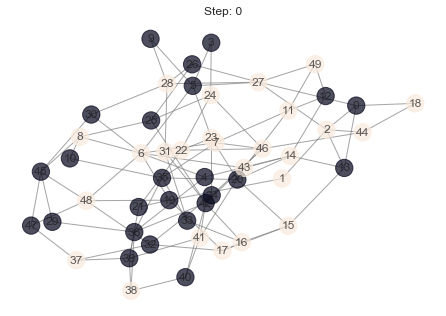

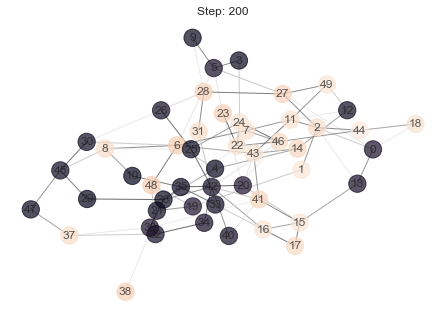

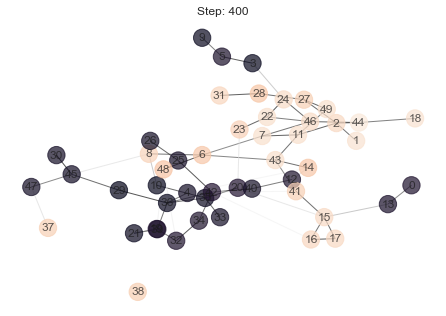

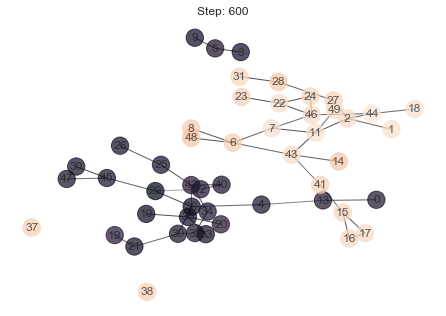

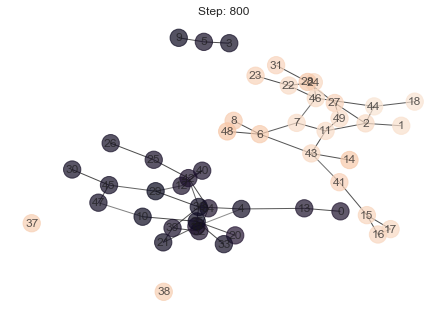

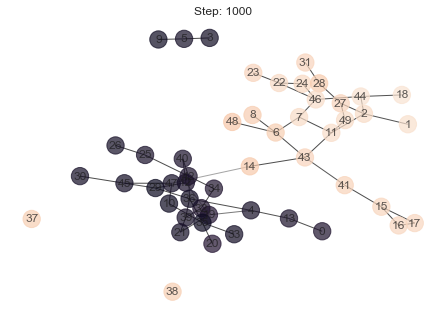

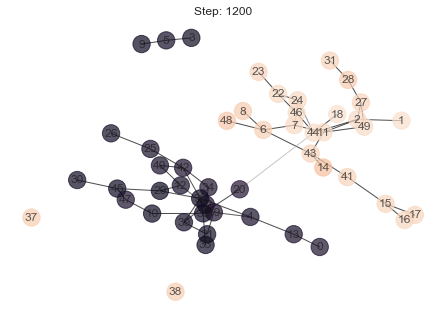

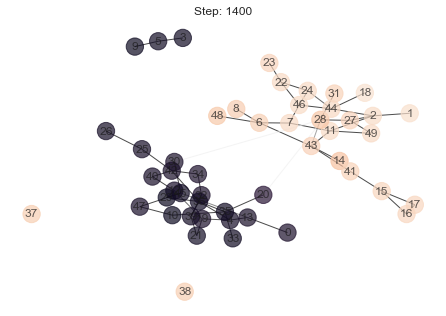

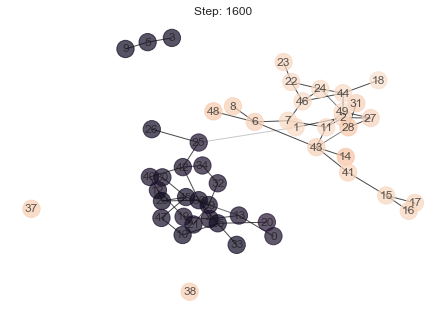

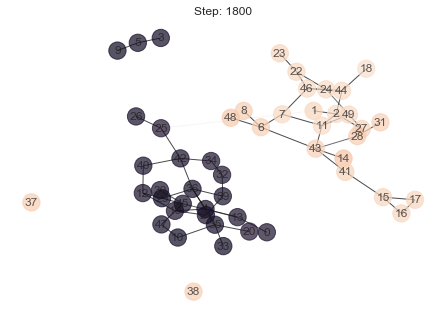

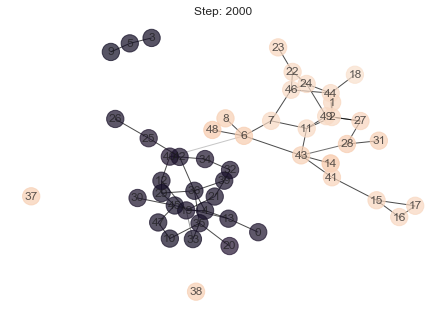

In [3]:
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(200):
        sim.update()
    plt.figure()
    sim.observe()

In [46]:
#Edited version of the code above, curtersy of  scheffler https://github.com/thetruejacob/CS166/blob/master/Network%20Simulation%20Assignment/Network%20Simulation.ipynb
class antiestablishment:
    def __init__(self, graph=nx.watts_strogatz_graph(n= 100, k = 5, p = 0.5), gamma= 0.5, waiting = (0.6, 0.4)):
            
   # Simulate social dynamics by strengthening opinions and connection weights
    #based on random interactions between nodes.

        self.graph = graph
        self.gamma = gamma
        self.node_record = [self.graph.nodes]
        self.m_antiestablishment, self.m_conformist = [], []
        self.waiting_1, self.waiting_2 = waiting

    def initialize(self):
        #Initialize the simulation with a random graph, with random 0 or 1
       # opinions assigned to all nodes and initial edge weights of 0.5.
        for node in self.graph.nodes:
            self.graph.nodes[node]['antiestablishment'] = True if random.random() < self.gamma else False
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
            self.graph.nodes[node]['delay'] = np.rint(np.random.normal(self.waiting_1, self.waiting_2, 1))

        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        size = [(self.graph.nodes[i]['delay'] + .25) * 300
                    for i in self.graph.nodes]
        labels = {i: round(self.graph.nodes[i]['opinion'], 2) 
                      for i in self.graph.nodes}
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            labels = labels, node_size = size,
            node_color=[self.graph.nodes[i]['antiestablishment'] for i in self.graph.nodes],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))
        
  # Create a new edge with weight 0.5 between two unconnected nodes
    def update(self):
        # select a node at random, find its neighbors and delay
        selected_node = random.sample(list(self.graph.nodes), 1)[0]
        neighbors = [key for key in self.graph.neighbors(selected_node)]
        delay = int(self.graph.nodes[selected_node]['delay'][0])

        # find its delayed neighbors and calculate trend
        personal = self.node_record[-delay] if len(self.node_record) >= delay else self.node_record[-1]
        trait = np.mean([personal[i]['opinion'] for i in neighbors])

        # update its stochastic based on trend and if it is antiestablishment'
        if self.graph.nodes[selected_node]['antiestablishment']:
            self.graph.nodes[selected_node]['opinion'] = np.random.binomial(1, 1 - trait) 
        else:
            self.graph.nodes[selected_node]['opinion'] = np.random.binomial(1, trait) 
        self.node_record.append(self.graph.nodes)

        p_antiestablishment = [self.graph.nodes[i]['opinion'] if self.graph.nodes[i]['antiestablishment'] 
                             else None for i in self.graph.nodes]

        p_conformists = [self.graph.nodes[i]['opinion'] if not self.graph.nodes[i]['antiestablishment'] 
                             else None for i in self.graph.nodes]
        self.m_antiestablishment.append(np.mean(list(filter(None.__ne__, p_antiestablishment))))
        self.m_conformist.append(np.mean(list(filter(None.__ne__, p_conformists))))


        self.step += 1

    def plot_figure(self):
        plt.figure()
        plt.plot(range(len(self.m_antiestablishment)), self.m_antiestablishment, 'g-', label = 'antiestablishment')
        plt.plot(range(len(self.m_conformist)), self.m_conformist, 'b-', label = 'conformist') 
        plt.legend()



Text(0, 0.5, 'Average opinion')

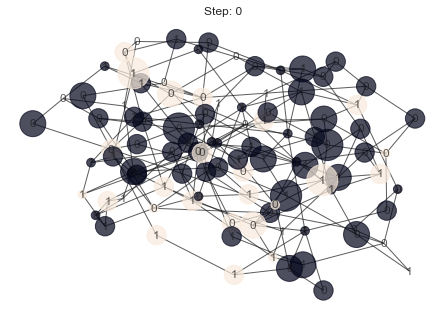

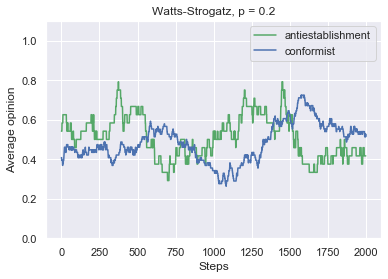

In [47]:
#plotting figure and running test
t= antiestablishment (gamma= 0.2, waiting = (0.6, 1))
t.initialize()
plt.figure()
t.observe()
for i in range(10):
    for i in range(200):
        t.update()
t.plot_figure()
plt.xlabel('Steps')
plt.ylim(0,1.1)
plt.title('Watts-Strogatz, p = 0.2')
plt.ylabel("Average opinion")

# Playing with P

Text(0, 0.5, 'Average opinion')

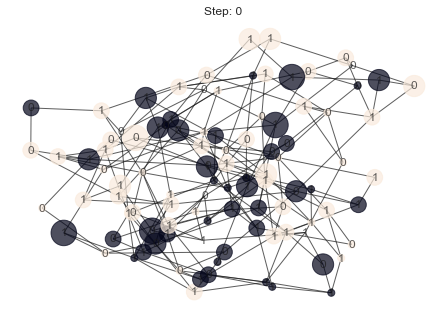

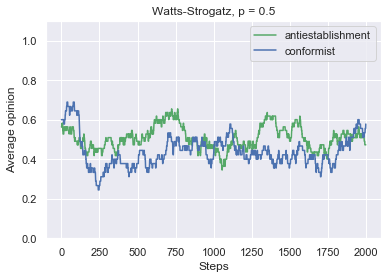

In [42]:
#plotting figure and running test
t = antiestablishment (gamma= 0.5, waiting = (0.7, 1))
t.initialize()
plt.figure()
t.observe()
for i in range(10):
    for i in range(200):
        t.update()
t.plot_figure()
plt.title('Watts-Strogatz, p = 0.5')
plt.ylabel("Average opinion")
plt.xlabel('Steps')
plt.ylim(0,1.1)
plt.ylabel("Average opinion")


Text(0, 0.5, 'Average opinion')

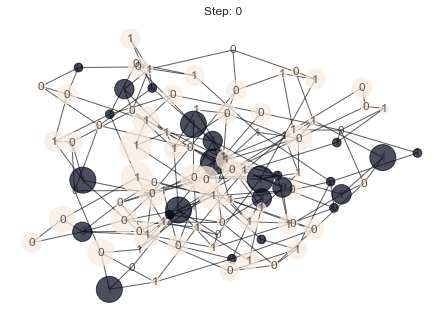

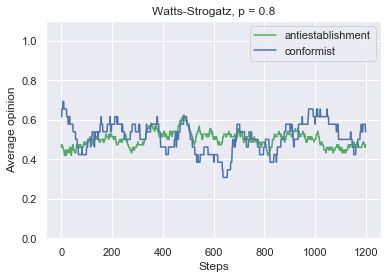

In [7]:
#plotting figure and running test
t = antiestablishment (gamma= 0.8, waiting = (0.7, 1))
t.initialize()
plt.figure()
t.observe()
for i in range(10):
    for i in range(200):
        t.update()
t.plot_figure()
plt.title('Watts-Strogatz, p = 0.8')
plt.ylabel("Average opinion")
plt.xlabel('Steps')
plt.ylim(0,1.1)
plt.ylabel("Average opinion")

/Users/henrybiko/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrybiko/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Average opinion')

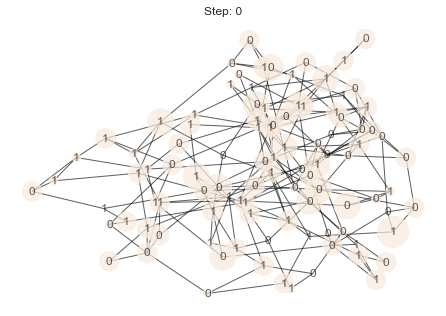

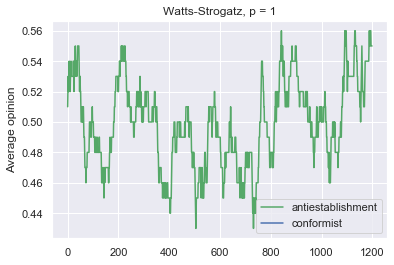

In [8]:
#plotting figure and running test
t= antiestablishment (gamma= 1, waiting = (0.7, 1))
t.initialize()
plt.figure()
t.observe()
for i in range(10):
    for i in range(200):
        t.update()
t.plot_figure()
plt.title('Watts-Strogatz, p = 1')
plt.ylabel("Average opinion")

(0, 1.1)

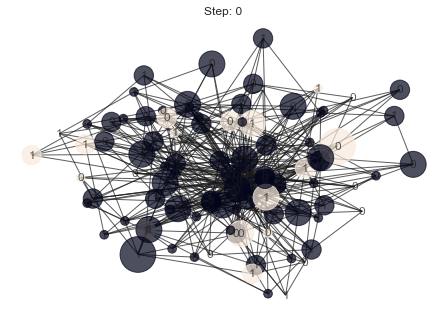

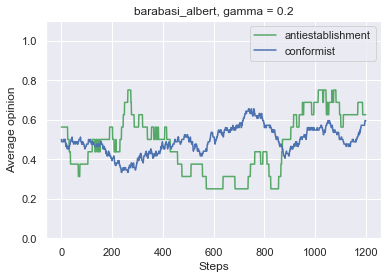

In [9]:
#plotting figure and running test
t = antiestablishment (graph = nx.barabasi_albert_graph(100, 5),gamma = 0.2, waiting= (0.7, 1))
t.initialize()
plt.figure()
t.observe()
for i in range(10):
    for i in range(200):
        t.update()
t.plot_figure()
plt.title('barabasi_albert, gamma = 0.2')
plt.ylabel("Average opinion")
plt.xlabel('Steps')
plt.ylim(0,1.1)


(0, 1.1)

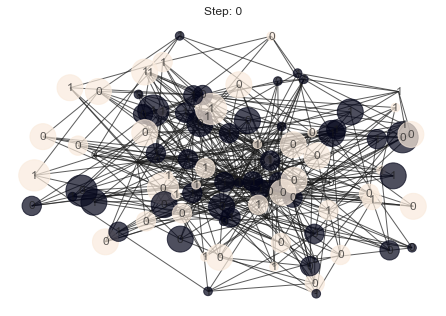

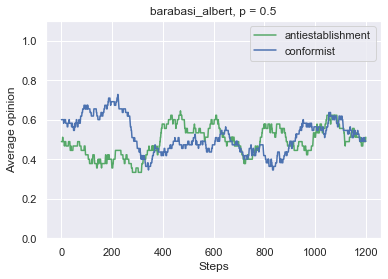

In [21]:
#plotting figure and running test
t = antiestablishment (graph = nx.barabasi_albert_graph(100, 5),gamma = 0.5, waiting= (0.7, 1))
t.initialize()
plt.figure()
t.observe()
for i in range(10):
    for i in range(200):
        t.update()
t.plot_figure()
plt.title('barabasi_albert, p = 0.5')
plt.ylabel("Average opinion")
plt.xlabel('Steps')
plt.ylim(0,1.1)


(0, 1.1)

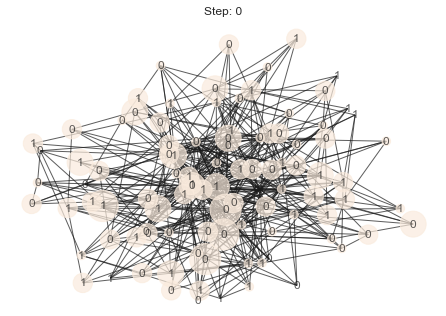

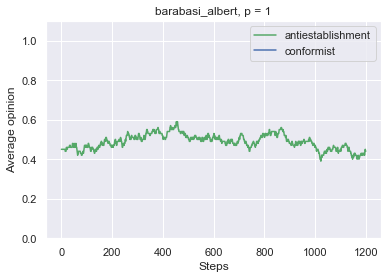

In [22]:
#plotting figure
t = antiestablishment (graph = nx.barabasi_albert_graph(100, 5),gamma = 1, waiting= (0.7, 1))
t.initialize()
plt.figure()
t.observe()
for i in range(10):
    for i in range(200):
        t.update()
t.plot_figure()
plt.title('barabasi_albert, p = 1')
plt.ylabel("Average opinion")
plt.xlabel('Steps')
plt.ylim(0,1.1)


(0, 1.1)

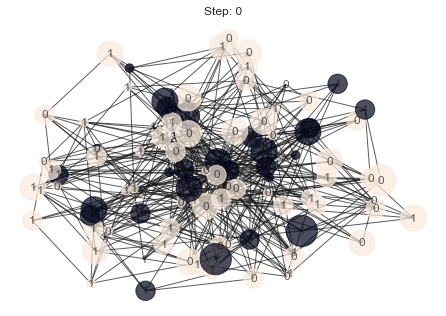

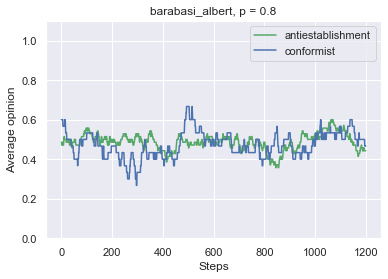

In [11]:
#plotting figure
t = antiestablishment (graph = nx.barabasi_albert_graph(100, 5),gamma = 0.7, waiting= (0.7, 1))
t.initialize()
plt.figure()
t.observe()
for i in range(10):
    for i in range(200):
        t.update()
t.plot_figure()
plt.title('barabasi_albert, p = 0.8')
plt.ylabel("Average opinion")
plt.xlabel('Steps')
plt.ylim(0,1.1)


In [23]:
#plotting figure and running test two nodes
random.seed(5)
graph = nx.Graph()
graph.add_nodes_from(['antiestablishment_1', 'antiestablishment_2'])
graph.add_edges_from([('antiestablishment_1', 'antiestablishment_2')])

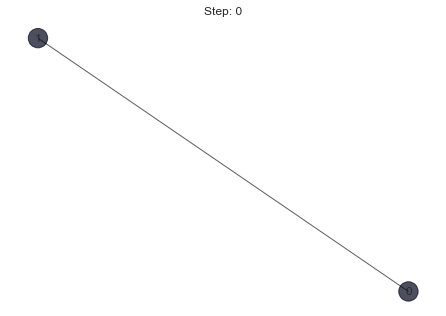

In [24]:
nodes = antiestablishment(graph = graph)
nodes.initialize()
plt.figure()
nodes.observe()
plt.show()

(0, 1.1)

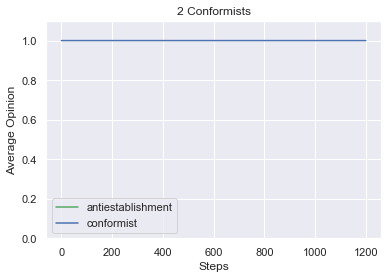

In [25]:
#plotting figure and running test two nodes
for i in range(10):
    for i in range(200):
        nodes.update()
nodes.plot_figure()
plt.title('2 Conformists')
plt.ylabel('Average Opinion')
plt.xlabel('Steps')
plt.ylim(0,1.1)

In [26]:
random.seed(13)
graph = nx.Graph()
graph.add_nodes_from(['antiestablishment_1', 'antiestablishment_2'])
graph.add_edges_from([('antiestablishment_1', 'antiestablishment_2')])

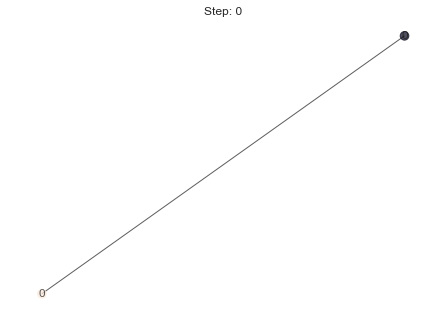

In [27]:
nodes = antiestablishment(graph = graph)
nodes.initialize()
plt.figure()
nodes.observe()
plt.show()

(0, 1.1)

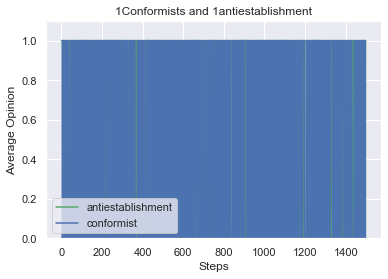

In [28]:
#plotting figure and running test two nodes
for i in range(10):
    for i in range(200):
        nodes.update()
nodes.plot_figure()
plt.title('1Conformists and 1antiestablishment')
plt.ylabel('Average Opinion')
plt.xlabel('Steps')
plt.ylim(0,1.1)

In [29]:
random.seed(3)
graph = nx.Graph()
graph.add_nodes_from(['antiestablishment_1', 'antiestablishment_2'])
graph.add_edges_from([('antiestablishment_1', 'antiestablishment_2')])

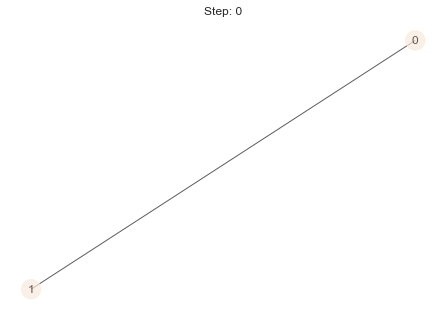

In [30]:
nodes = antiestablishment(graph = graph)
nodes.initialize()
plt.figure()
nodes.observe()
plt.show()

(0, 1.1)

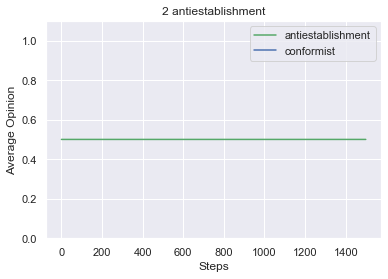

In [31]:
#plotting figure and running test two nodes
for i in range(10):
    for i in range(200):
        nodes.update()
nodes.plot_figure()
plt.title('2 antiestablishment')
plt.ylabel('Average Opinion')
plt.xlabel('Steps')
plt.ylim(0,1.1)